# Wczytanie wymaganych bibliotek

In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# MCA - kod

In [188]:
def mca(data):
    df_encoded = pd.get_dummies(data.astype(str))
    df_numeric = df_encoded.astype(int)
    labels = df_numeric.columns.tolist()
    A = df_numeric
    N = A.shape[0]
    P = A / N

    r = P.sum(axis=1)
    c = P.sum(axis=0)

    S = (P - np.outer(r, c)) / np.sqrt(np.outer(r, c))
    U, Sigma, VT = np.linalg.svd(S, full_matrices=False)

    eigenvalues = Sigma**2
    explained_variance_ratio = eigenvalues / eigenvalues.sum() * 100

    explained_variance_ratio_no_first = explained_variance_ratio[1:]
    total_no_first = explained_variance_ratio_no_first.sum()
    
    wyjas = []
    for i, ratio in enumerate(explained_variance_ratio_no_first, start=2):
        perc = ratio / total_no_first * 100
        wyjas.append(perc)

    Dr_inv_sqrt = np.diag(1 / np.sqrt(r))
    Dc_inv_sqrt = np.diag(1 / np.sqrt(c))
    F = Dr_inv_sqrt @ U @ np.diag(Sigma)
    G = Dc_inv_sqrt @ VT.T @ np.diag(Sigma)

    
    plt.figure(figsize=(8, 6))
    # plt.scatter(F[:, 1], F[:, 2], c='blue', label='Wiersze')
    plt.scatter(G[:, 1], G[:, 2], c='red', label='Kolumny')

    # for i in range(F.shape[0]):
    #     plt.text(F[i, 1], F[i, 2], f'W{i+1}', color='blue')
    for j in range(G.shape[0]):
        plt.text(G[j, 1], G[j, 2]+0.025, labels[j])

    plt.title('MCA - principal')
    plt.xlabel(f'Wymiar 1: {wyjas[0]:.2f}%')
    plt.ylabel(f'Wymiar 2: {wyjas[1]:.2f}%')
    plt.legend()
    plt.grid(True)
    plt.show()

# Przykład 1

## Symulacja danych

In [189]:
plcie = ['K', 'M']
miejsca = ['wieś', 'miasteczko', 'miasto']
partie = ['A', 'B', 'C']
n = 10000

def przypisz_partie(plc, mjsc):
    if plc == 'M' and mjsc == 'wieś':
        return np.random.choice(partie, p=[0.75, 0.05, 0.2])
    elif plc == 'M' and mjsc == 'miasteczko':
        return np.random.choice(partie, p=[0.5, 0.2, 0.3])
    elif plc == 'M':
        return np.random.choice(partie, p=[0.4, 0.4, 0.2])
    elif plc == 'K' and mjsc == 'miasto':
        return np.random.choice(partie, p=[0.05, 0.75, 0.2])
    elif plc == 'K' and mjsc == 'miasteczko':
        return np.random.choice(partie, p=[0.2, 0.5, 0.3])
    elif plc == 'K':
        return np.random.choice(partie, p=[0.35, 0.4, 0.25])
    return np.random.choice(partie)

dane = pd.DataFrame({
    'PŁEĆ': np.random.choice(plcie, size=n),
    'MIEJSCE': np.random.choice(miejsca, size=n)
})
dane['PARTIA'] = dane.apply(lambda row: przypisz_partie(row['PŁEĆ'], row['MIEJSCE']), axis=1)



## MCA

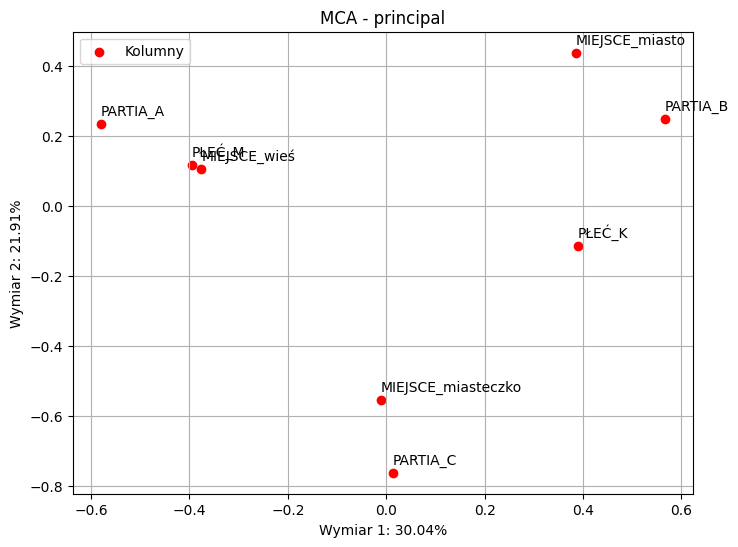

In [190]:
mca(dane)

# Przykład 2

## Symulacja danych

In [191]:
plcie = ['K', 'M']
n = 10000

def styl_zycia(plc):
    aktywnosc = np.random.choice(['aktywny', 'siedzący'], p=[0.55, 0.45]) if plc == 'M' else np.random.choice(['aktywny', 'siedzący'], p=[0.65, 0.35])
    
    if aktywnosc == 'aktywny':
        dieta = np.random.choice(['zdrowa', 'zwykła', 'niezdrowa'], p=[0.5, 0.4, 0.1])
    else:
        dieta = np.random.choice(['zdrowa', 'zwykła', 'niezdrowa'], p=[0.2, 0.5, 0.3])
    
    palenie = np.random.choice(['tak', 'nie'], p=[0.4, 0.6]) if plc == 'M' else np.random.choice(['tak', 'nie'], p=[0.25, 0.75])
    
    sen = np.random.choice(['<6h', '6-8h', '>8h'], p=[0.2, 0.6, 0.2]) if palenie == 'nie' else np.random.choice(['<6h', '6-8h', '>8h'], p=[0.4, 0.5, 0.1])

    if palenie == 'tak' or sen == '<6h':
        stres = np.random.choice(['niski', 'umiarkowany', 'wysoki'], p=[0.1, 0.4, 0.5])
    else:
        stres = np.random.choice(['niski', 'umiarkowany', 'wysoki'], p=[0.3, 0.5, 0.2])
    
    return aktywnosc, dieta, palenie, sen, stres

dane = pd.DataFrame({
    'PŁEĆ': np.random.choice(plcie, size=n)
})

styl_danych = dane['PŁEĆ'].apply(styl_zycia)
dane[['AKTYWNOŚĆ', 'DIETA', 'PALENIE', 'SEN', 'STRES']] = pd.DataFrame(styl_danych.tolist(), index=dane.index)

In [192]:
dane.head()

,PŁEĆ,AKTYWNOŚĆ,DIETA,PALENIE,SEN,STRES
0,K,aktywny,zdrowa,nie,>8h,wysoki
1,M,siedzący,zwykła,nie,<6h,umiarkowany
2,M,siedzący,zwykła,nie,6-8h,umiarkowany
3,K,aktywny,zdrowa,tak,<6h,umiarkowany
4,K,siedzący,zdrowa,nie,<6h,wysoki


In [193]:
df_encoded = pd.get_dummies(dane.astype(str))
df_encoded.head()

,PŁEĆ_K,PŁEĆ_M,AKTYWNOŚĆ_aktywny,AKTYWNOŚĆ_siedzący,DIETA_niezdrowa,DIETA_zdrowa,DIETA_zwykła,PALENIE_nie,PALENIE_tak,SEN_6-8h,SEN_<6h,SEN_>8h,STRES_niski,STRES_umiarkowany,STRES_wysoki
0,True,False,True,False,False,True,False,True,False,False,False,True,False,False,True
1,False,True,False,True,False,False,True,True,False,False,True,False,False,True,False
2,False,True,False,True,False,False,True,True,False,True,False,False,False,True,False
3,True,False,True,False,False,True,False,False,True,False,True,False,False,True,False
4,True,False,False,True,False,True,False,True,False,False,True,False,False,False,True


In [194]:
df_numeric = df_encoded.astype(int)
df_numeric.head()

,PŁEĆ_K,PŁEĆ_M,AKTYWNOŚĆ_aktywny,AKTYWNOŚĆ_siedzący,DIETA_niezdrowa,DIETA_zdrowa,DIETA_zwykła,PALENIE_nie,PALENIE_tak,SEN_6-8h,SEN_<6h,SEN_>8h,STRES_niski,STRES_umiarkowany,STRES_wysoki
0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1
1,0,1,0,1,0,0,1,1,0,0,1,0,0,1,0
2,0,1,0,1,0,0,1,1,0,1,0,0,0,1,0
3,1,0,1,0,0,1,0,0,1,0,1,0,0,1,0
4,1,0,0,1,0,1,0,1,0,0,1,0,0,0,1


In [195]:
burt_table = df_numeric.T @ df_numeric
burt_table

,PŁEĆ_K,PŁEĆ_M,AKTYWNOŚĆ_aktywny,AKTYWNOŚĆ_siedzący,DIETA_niezdrowa,DIETA_zdrowa,DIETA_zwykła,PALENIE_nie,PALENIE_tak,SEN_6-8h,SEN_<6h,SEN_>8h,STRES_niski,STRES_umiarkowany,STRES_wysoki
PŁEĆ_K,4999,0,3281,1718,861,1980,2158,3695,1304,2838,1271,890,1083,2302,1614
PŁEĆ_M,0,5001,2823,2178,965,1778,2258,3024,1977,2793,1386,822,1021,2253,1727
AKTYWNOŚĆ_aktywny,3281,2823,6104,0,630,3025,2449,4138,1966,3458,1601,1045,1296,2759,2049
AKTYWNOŚĆ_siedzący,1718,2178,0,3896,1196,733,1967,2581,1315,2173,1056,667,808,1796,1292
DIETA_niezdrowa,861,965,630,1196,1826,0,0,1249,577,1052,477,297,389,844,593
DIETA_zdrowa,1980,1778,3025,733,0,3758,0,2502,1256,2093,1009,656,793,1676,1289
DIETA_zwykła,2158,2258,2449,1967,0,0,4416,2968,1448,2486,1171,759,922,2035,1459
PALENIE_nie,3695,3024,4138,2581,1249,2502,2968,6719,0,4010,1324,1385,1747,3251,1721
PALENIE_tak,1304,1977,1966,1315,577,1256,1448,0,3281,1621,1333,327,357,1304,1620
SEN_6-8h,2838,2793,3458,2173,1052,2093,2486,4010,1621,5631,0,0,1351,2656,1624


In [196]:
def mca(data):
    df_encoded = pd.get_dummies(data.astype(str))
    df_numeric = df_encoded.astype(int)
    labels = df_numeric.columns.tolist()
    A = df_numeric
    N = A.shape[0]
    P = A / N

    r = P.sum(axis=1)
    c = P.sum(axis=0)

    S = (P - np.outer(r, c)) / np.sqrt(np.outer(r, c))
    U, Sigma, VT = np.linalg.svd(S, full_matrices=False)

    eigenvalues = Sigma**2
    explained_variance_ratio = eigenvalues / eigenvalues.sum() * 100

    explained_variance_ratio_no_first = explained_variance_ratio[1:]
    total_no_first = explained_variance_ratio_no_first.sum()

    wyjas = []
    for i, ratio in enumerate(explained_variance_ratio_no_first, start=2):
        perc = ratio / total_no_first * 100
        wyjas.append(perc)

    Dr_inv_sqrt = np.diag(1 / np.sqrt(r))
    Dc_inv_sqrt = np.diag(1 / np.sqrt(c))
    F = Dr_inv_sqrt @ U @ np.diag(Sigma)
    G = Dc_inv_sqrt @ VT.T @ np.diag(Sigma)

    plt.figure(figsize=(8, 6))
    plt.scatter(G[:, 1], G[:, 2], c='red', label='Kolumny')

    for j in range(G.shape[0]):
        plt.text(G[j, 1], G[j, 2] + 0.025, f'{j+1}', color='black', ha='center', fontsize=9)

    plt.title('MCA - principal')
    plt.xlabel(f'Wymiar 1: {wyjas[0]:.2f}%')
    plt.ylabel(f'Wymiar 2: {wyjas[1]:.2f}%')
    plt.legend()
    plt.grid(True)
    plt.show()

    for i, label in enumerate(labels):
        print(f"{i+1:>2}. {label}")


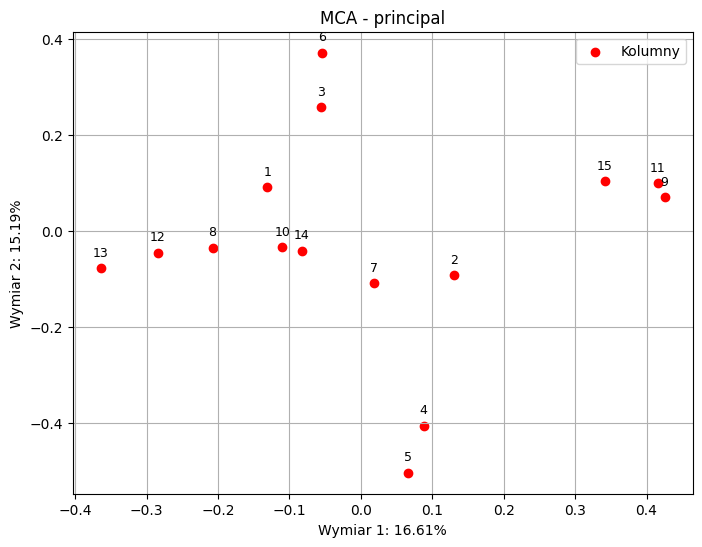

 1. PŁEĆ_K
 2. PŁEĆ_M
 3. AKTYWNOŚĆ_aktywny
 4. AKTYWNOŚĆ_siedzący
 5. DIETA_niezdrowa
 6. DIETA_zdrowa
 7. DIETA_zwykła
 8. PALENIE_nie
 9. PALENIE_tak
10. SEN_6-8h
11. SEN_<6h
12. SEN_>8h
13. STRES_niski
14. STRES_umiarkowany
15. STRES_wysoki


In [197]:
mca(dane)